<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/New_Normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [7]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [8]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [9]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

In [10]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return loader

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

In [12]:
def get_damage(distance):
    f_car = ((distance[0] - 3.57)/(37.564-3.57)*100)
    r_car = ((distance[1] - 4.308)/(37.966-4.308)*100)
    b_car = ((distance[2] - 3.401)/(21.090-3.401)*100)
    l_car = ((distance[3] - 11.230)/(48.075-11.230)*100)
    dmgs = [f_car,r_car,b_car,l_car]
    return dmgs

# Mirror

In [13]:
car1_loader = get_dataset(r'/content/drive/MyDrive/normalize/base/mir/')
dmg1_loader = get_dataset(r'/content/drive/MyDrive/normalize/dmg/mirror/')

In [14]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


In [15]:
id_mir = get_euclidean(id1b,id1v)
id_mir

[7.895974636077881,
 10.863054275512695,
 15.683631896972656,
 18.249889373779297,
 15.69296932220459,
 0.5051827430725098,
 20.419198989868164,
 1.5713732242584229,
 9.804802894592285]

In [16]:
for i in range(len(id_mir)):
    print(((id_mir[i] - 0.505)/(41.55-0.505)*100))

18.007003620606362
25.235849130253857
36.980465091905614
43.23276738647655
37.003214331111195
0.00044522614815388283
48.517965622775414
2.5980587751453847
22.657578010944782


In [21]:
id5f = cv2.imread('/content/drive/MyDrive/normalize/base/mir/mir/ID5f.png')
id5_1 = cv2.imread('/content/drive/MyDrive/normalize/dmg/mirror/mirror/ID5dmgm.png')
id7f = cv2.imread('/content/drive/MyDrive/normalize/base/mir/mir/ID7f.png')
id7_1 = cv2.imread('/content/drive/MyDrive/normalize/dmg/mirror/mirror/ID7dmgm.png')

Text(300, 700, 'Distance = 1.571')

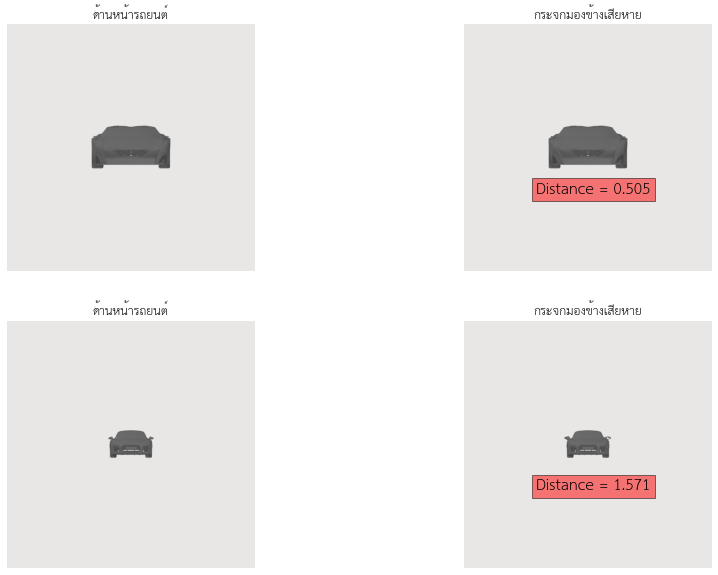

In [25]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id5f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id5_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(300,700,'Distance = '+str(round(id_mir[5],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id7f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id7_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(300,700,'Distance = '+str(round(id_mir[7],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# front

In [17]:
car2_loader = get_dataset(r'/content/drive/MyDrive/normalize/base/front1/')
dmg2_loader = get_dataset(r'/content/drive/MyDrive/normalize/dmg/front1/')

In [18]:
id2b = get_features(vgg,car2_loader)
id2v = get_features(vgg,dmg2_loader)

100%|██████████| 1/1 [00:03<00:00,  3.63s/it]


In [19]:
id_front = get_euclidean(id2b,id2v)
id_front

[20.370634078979492,
 11.851751327514648,
 11.37433910369873,
 12.546443939208984,
 8.184654235839844,
 15.816658020019531,
 9.359212875366211,
 7.7908525466918945,
 6.412318229675293,
 13.842572212219238]

In [20]:
for i in range(len(id_front)):
    print(((id_front[i] - 0.505)/(41.55-0.505)*100))

48.39964448527103
27.644661536154587
26.481518098912733
29.33717612183941
18.71032826371018
37.30456333297486
21.57196461290343
17.750889381634536
14.3922968197717
32.49499868977765


In [26]:
id10f = cv2.imread('/content/drive/MyDrive/normalize/base/front1/front1/ID10f.png')
id10_1 = cv2.imread('/content/drive/MyDrive/normalize/dmg/front1/front1/ID10dmgf1.png')
id9f = cv2.imread('/content/drive/MyDrive/normalize/base/front1/front1/ID9f.png')
id9_1 = cv2.imread('/content/drive/MyDrive/normalize/dmg/front1/front1/ID9dmgf1.png')

Text(300, 700, 'Distance = 13.843')

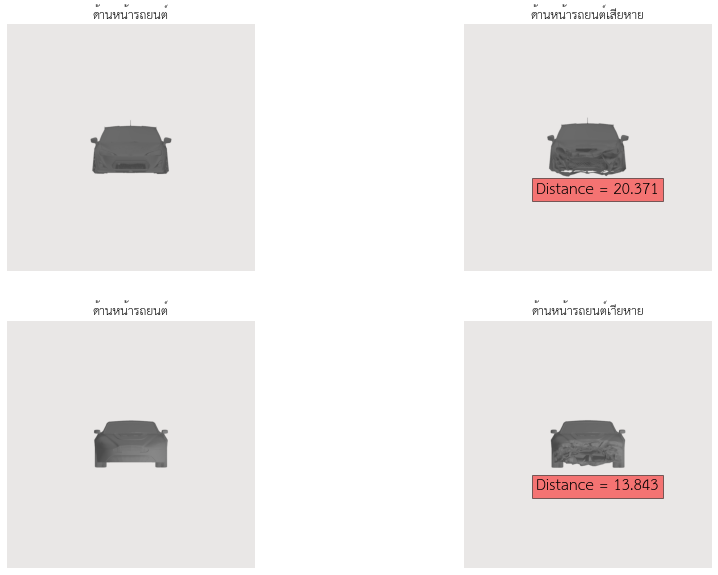

In [28]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id10f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id10_1)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(300,700,'Distance = '+str(round(id_front[0],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id9f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id9_1)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เาียหาย')
plt.text(300,700,'Distance = '+str(round(id_front[9],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))